In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from requests.compat import numeric_types
from scipy.stats import alpha

In [4]:
df = pd.read_csv("Ecommerce Customers.csv")

In [5]:
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [8]:
df.shape

(500, 8)

In [9]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

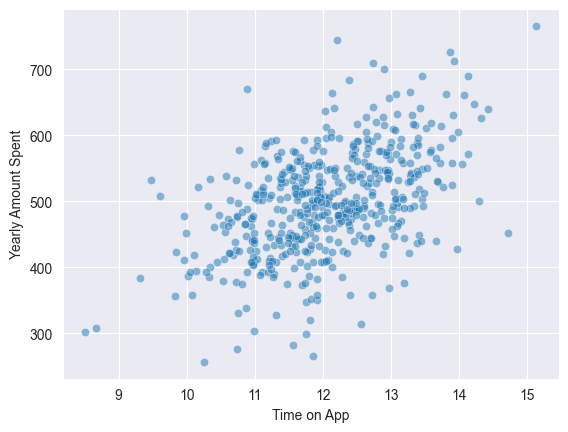

In [10]:
sns.scatterplot(x='Time on App', y='Yearly Amount Spent',alpha=0.5, data=df)

as we see above that there is a positive correlation between Time on App and Yearly Amount Spent, we can say that the more time a customer spends on the app, the more they tend to spend annually.but this is not the only factor that affects the yearly amount spent by customers. let check the correlation between the other features and the target variable.

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

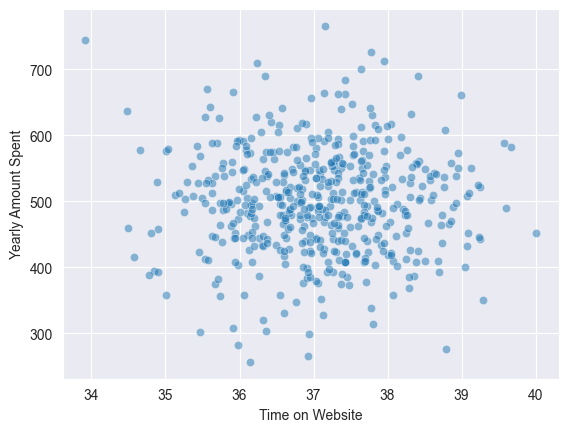

In [11]:
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent',alpha=0.5, data=df)

this is also good but lemme check more features

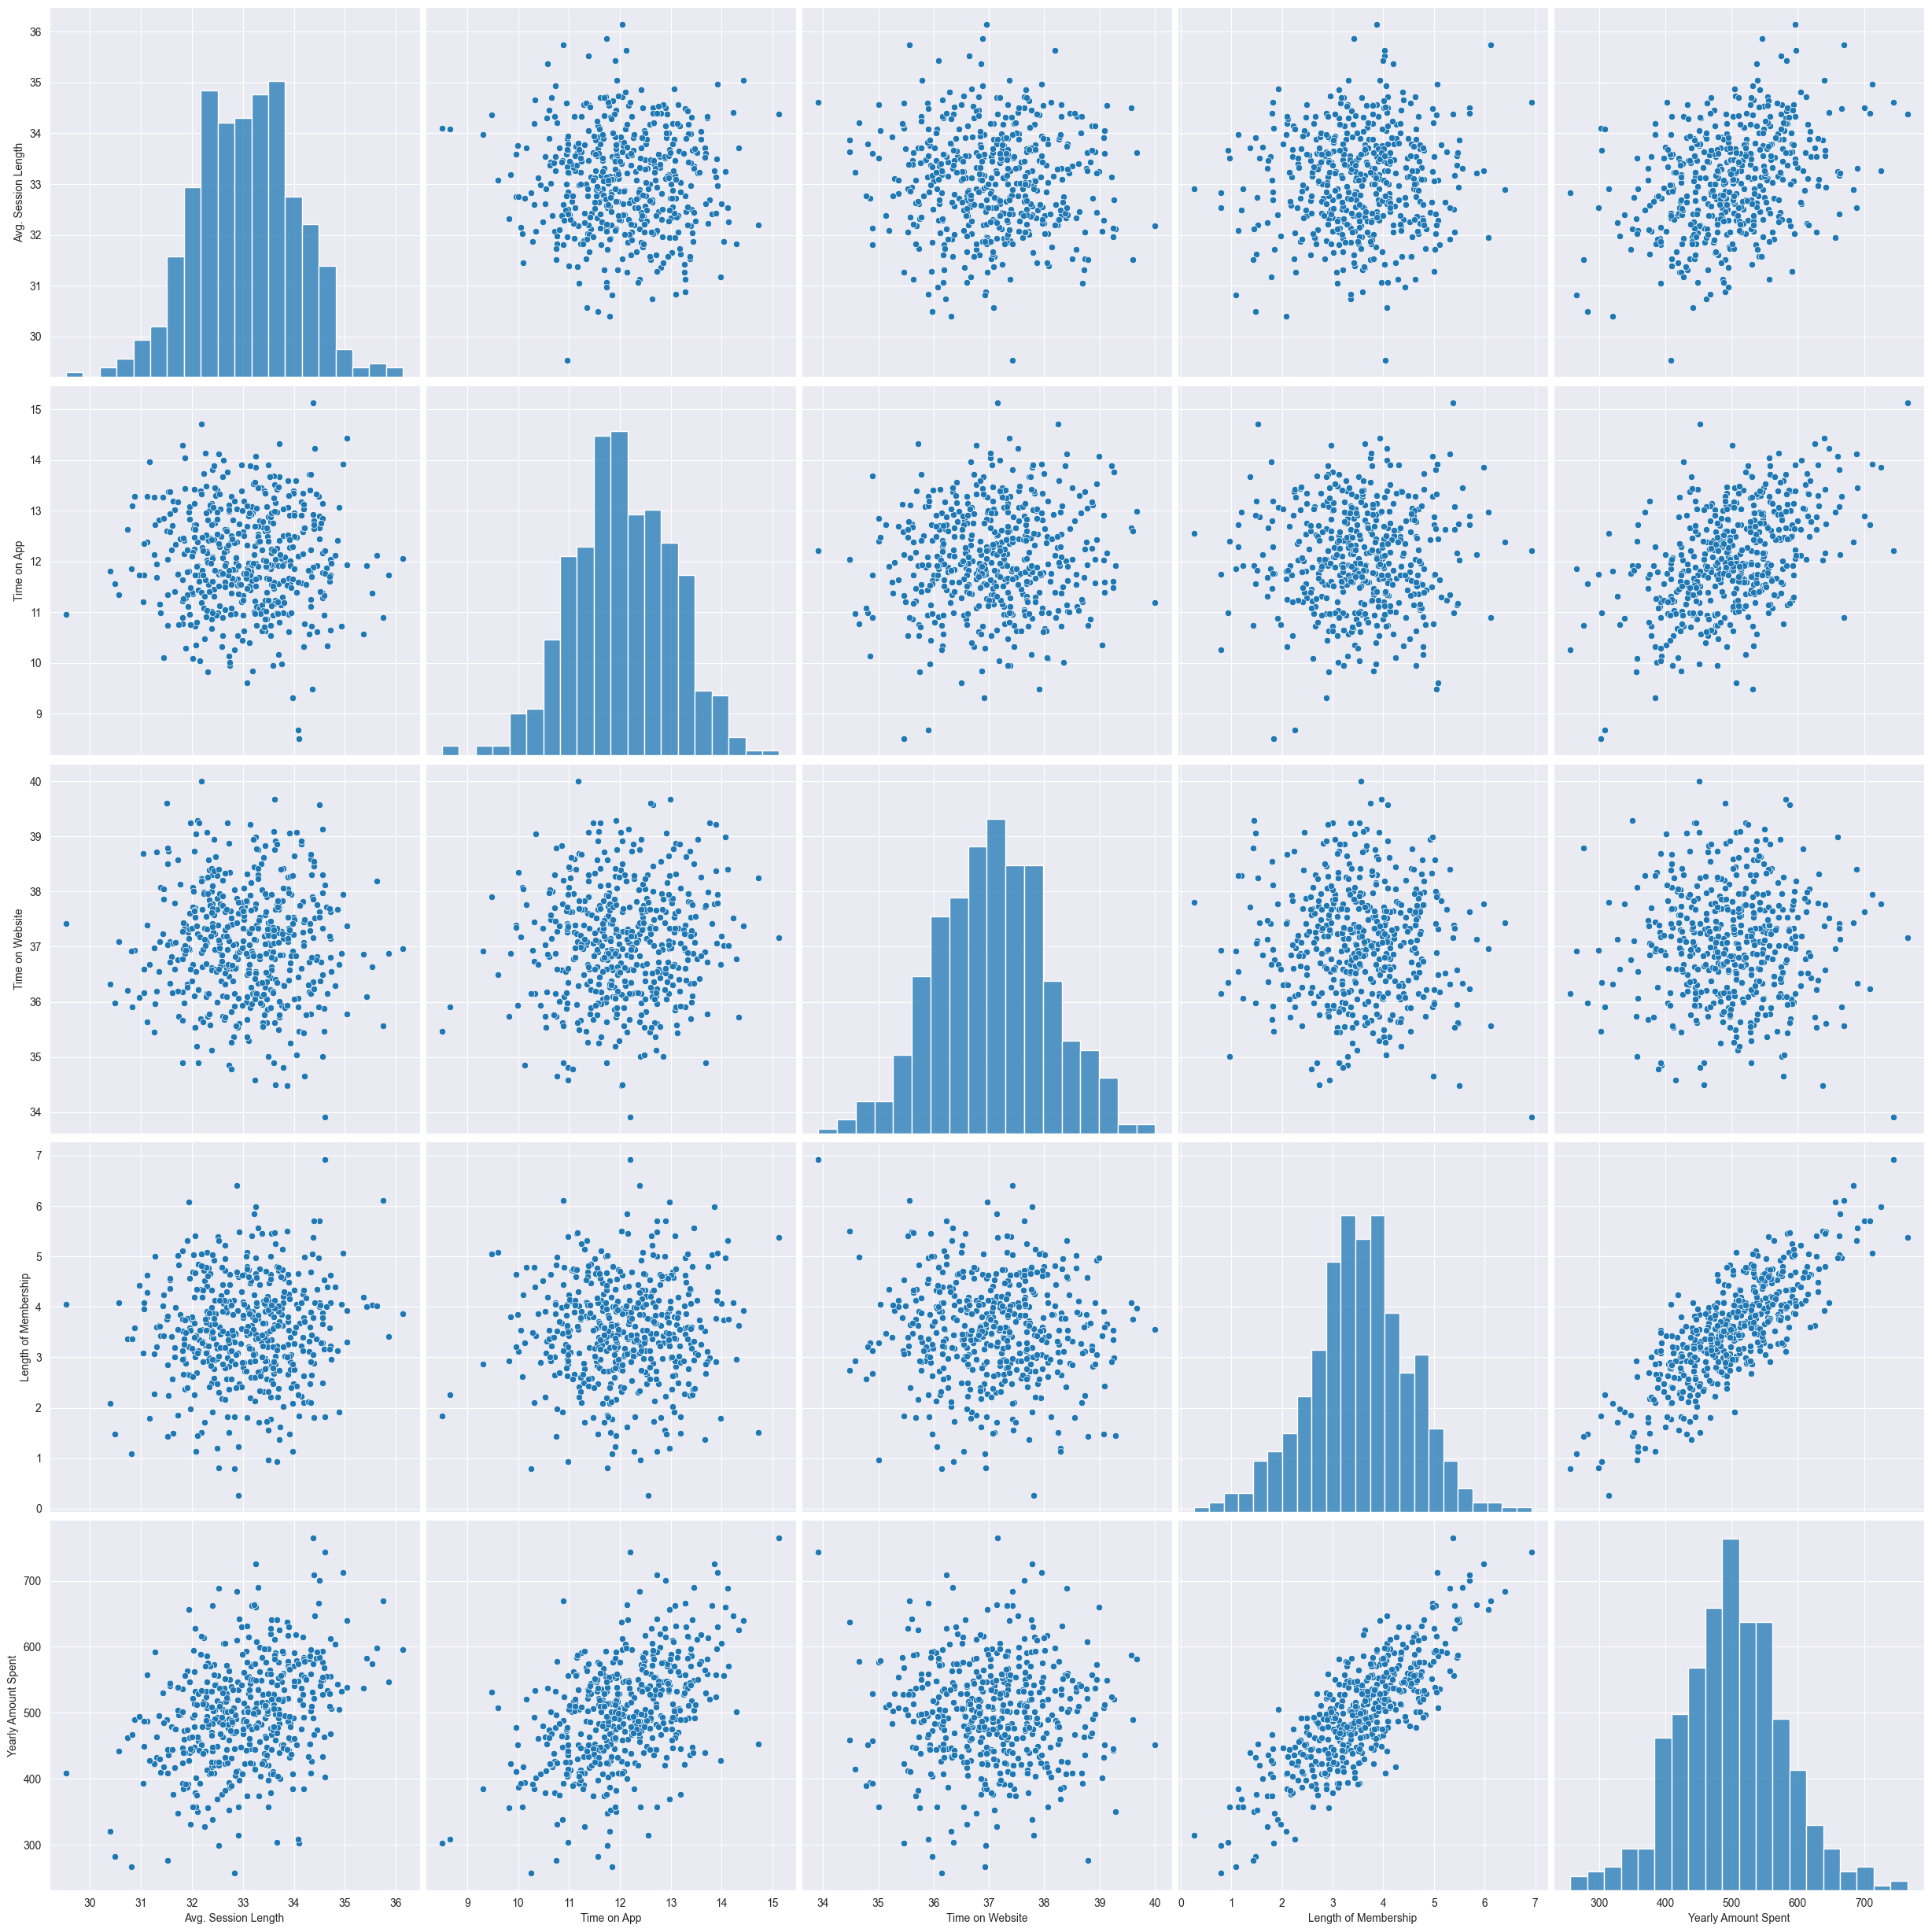

In [12]:
sns.pairplot(df, height=5, aspect=1, kind='scatter')

so here we can see that the Length of Membership has a strong positive correlation with the Yearly Amount Spent, which means that the longer a customer has been a member, the more they tend to spend annually.so let's check the correlation matrix to see the correlation between all features.

# correlation matrix

<Axes: >

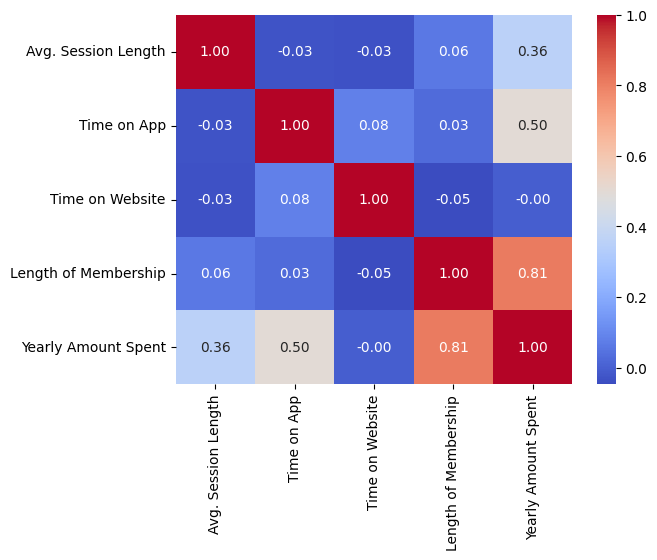

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

# as we see above, the Length of Membership has the highest correlation with the Yearly Amount Spent, followed by Time on App and Time on Website. so let's check the distribution of the target variable.

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

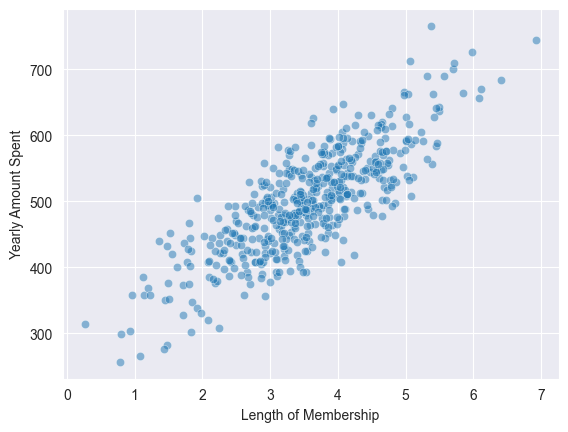

In [13]:
sns.scatterplot(x='Length of Membership', y= 'Yearly Amount Spent', alpha=0.5, data=df)

#so now we have to train our model first split the data using train_test_split function from sklearn.model_selection module.

In [27]:
from sklearn.model_selection import train_test_split

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
print(X_train.shape, X_test.shape)

(350, 4) (150, 4)


In [31]:
# now we have to scale the data using StandardScaler from sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [32]:
print(X_train_scaled, X_test_scaled)

[[ 0.81898265 -0.02177665 -2.46761848  1.86691469]
 [ 0.87429038 -0.03762014 -0.28806538 -0.80056171]
 [ 1.51059934  0.12128189  2.09322728  0.08501491]
 ...
 [-1.26027629 -1.15748164 -2.05511356 -0.43528945]
 [-0.80828501  2.07624947  0.02789298  0.18135749]
 [-0.64089425 -0.59762062  0.57343539 -0.96260714]] [[-9.92502521e-01 -1.69449304e+00  2.00901040e+00 -1.37474861e-01]
 [-2.54041967e-01  7.65431158e-01  3.57912643e-02  2.68494058e-01]
 [-1.62898365e+00 -1.93980915e+00  1.02740360e+00  6.44964221e-01]
 [-6.16830358e-01  1.40362714e+00  2.38899523e-01 -6.17556383e-01]
 [-1.68742659e+00 -1.05058356e+00  1.05778145e+00 -1.43023646e-01]
 [-6.35701242e-01  1.83155770e+00  1.35911584e+00  1.91967282e-01]
 [ 1.99712575e+00 -1.12423880e-01 -1.18679444e+00 -2.58587642e-01]
 [-4.58745785e-02 -2.86527459e-01  5.63609959e-01  2.51546231e-01]
 [-6.35782702e-01 -7.39751778e-01  6.71637711e-01 -7.75156662e-01]
 [-6.24441176e-02 -1.09778686e+00  6.39696465e-01  2.43622850e-01]
 [-1.13496245e+00 

In [34]:
#now it is the time to train our model using LinearRegression from sklearn.linear_model module.
from sklearn.linear_model import LinearRegression

mod = LinearRegression()

In [35]:
#now it is the time to fit the model on the training data.
mod.fit(X_test_scaled, y_test)

LinearRegression()

In [36]:
#now we have to check the coefficients of the model.

coefficients = pd.DataFrame(mod.coef_, X.columns, columns=['Coefficient'])

In [37]:
print(coefficients)

                      Coefficient
Avg. Session Length     25.566099
Time on App             39.117536
Time on Website          0.609626
Length of Membership    62.809316


In [38]:
#now we have to check the intercept of the model.
intercept = mod.intercept_
print(intercept)

500.8111668161018


In [39]:
#now we have to check the predictions of the model on the test data.
y_pred = mod.predict(X_test_scaled)

In [40]:
#now we have to check the performance of the model using mean_squared_error and r2_score from sklearn.metrics module.
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 101.42256983586226
R2 Score: 0.9813345614681899


In [41]:
#so here what its mean? so lets talk about this 
# Mean Squared Error (MSE) is a measure of the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

#now find the residuals 
print(y_test - y_pred)


361    -0.709264
73     -6.366645
374    -5.817207
155     2.673378
104     1.833966
         ...    
266    11.808844
23     16.956398
222   -15.051795
261    -4.803429
426    -2.909067
Name: Yearly Amount Spent, Length: 150, dtype: float64


<Axes: xlabel='Yearly Amount Spent'>

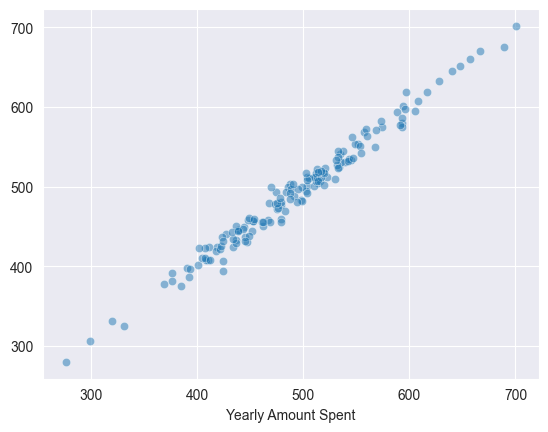

In [42]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

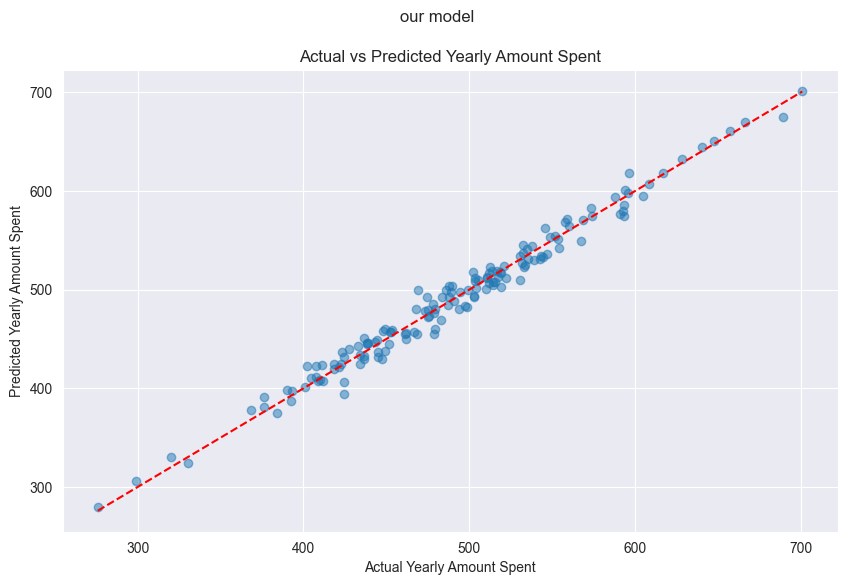

In [46]:
#so here we can see that the model is performing well, as the predicted values are close to the actual values.
#lets draw a linear line,so lets see
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.suptitle("our model")
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()
#for line

In [48]:
#if it is the model so lets end it okay, hahahha

import joblib

# Save the model to a file
joblib.dump(mod, 'linear_model.pkl')
# Load the model from the file
loaded_model = joblib.load('linear_model.pkl')
# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)
# Check if the predictions are the same
print(np.array_equal(y_pred, y_pred_loaded))  # Should print True if the model was loaded correctly



True
